In [16]:
# Ch2 Sutton and Barto - Implementations 
# we shouldn't know the value/reward of an action
# if we select an action multiple times the reward shouln't be same, but choose given a probability distribution across values
# what do i need to define such distribution?
# we are going to have 10 possible actions, therefore 10 estimates

import numpy as np
import matplotlib.pyplot as plt


<div style="text-align: center;">
    <img src="images/rewards.jpg" alt="image.png" style="width: 50%;"/>
    <figcaption>Reward distribution for the 10 armed bandit problem.</figcaption>
</div>


In [17]:
num_bandits = 10
# see image above
true_means = np.array([0.2,-0.8,1.5, 0.3,1.1, -1.4,-0.1,-1.0, 1.0, -0.6])
optimal_action = np.argmax(true_means)

def generate_reward(bandit):
    variance = 1 
    std = np.sqrt(variance)
    generated_number = np.random.normal(loc=true_means[bandit], scale=std)
    return generated_number

def simulation(epsilon, epochs):
    # initializing estimates to zero to avoid biases
    sum_estimates = np.zeros(num_bandits)
    num_estimates = np.zeros(num_bandits)

    # cumulative rewards over time | what was the optimal action over time
    cumulative_reward = np.zeros(epochs)
    optimal_action_count = np.zeros(epochs)
    
    for t in range(epochs):
        # max(1,estimates) just to avoid infinites 
        estimates = sum_estimates/np.maximum(num_estimates,1)
        # generate chance to make a random choice
        chance_other = np.random.rand()
        action = np.random.randint(0,num_bandits) if chance_other<epsilon else np.argmax(estimates)

        reward = generate_reward(action)
        sum_estimates[action] += reward
        num_estimates[action] += 1

        cumulative_reward[t] = reward
        if action == optimal_action:
            optimal_action_count[t] = 1
        
    return cumulative_reward, optimal_action_count

def run_simulation(epsilon, epochs, runs):

    all_rewards = np.zeros((runs,epochs))
    all_optimal = np.zeros((runs,epochs))

    for run in range(runs):
        rewards, optimal_actions = simulation(epsilon, epochs)
        all_rewards[run] = rewards
        all_optimal[run] = optimal_actions

    avg_rewards = np.mean(all_rewards,axis=0)
    avg_optimal = np.mean(all_optimal,axis=0)*100
    return avg_rewards, avg_optimal

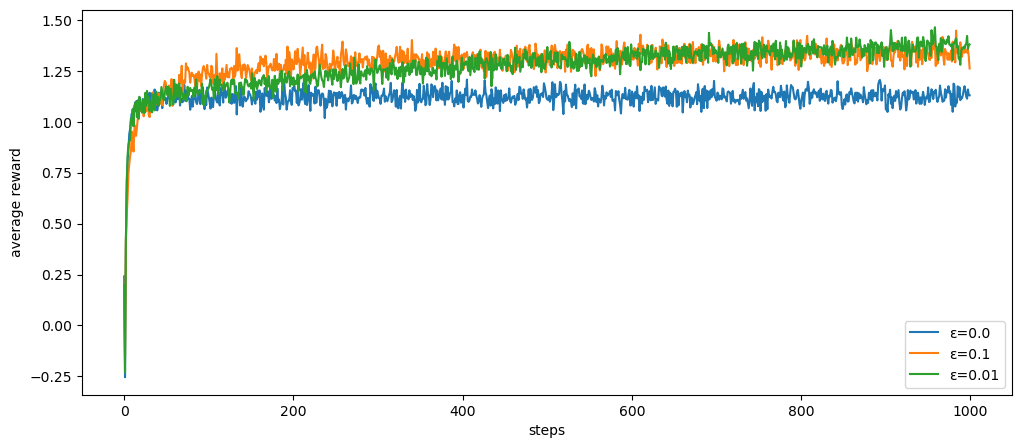

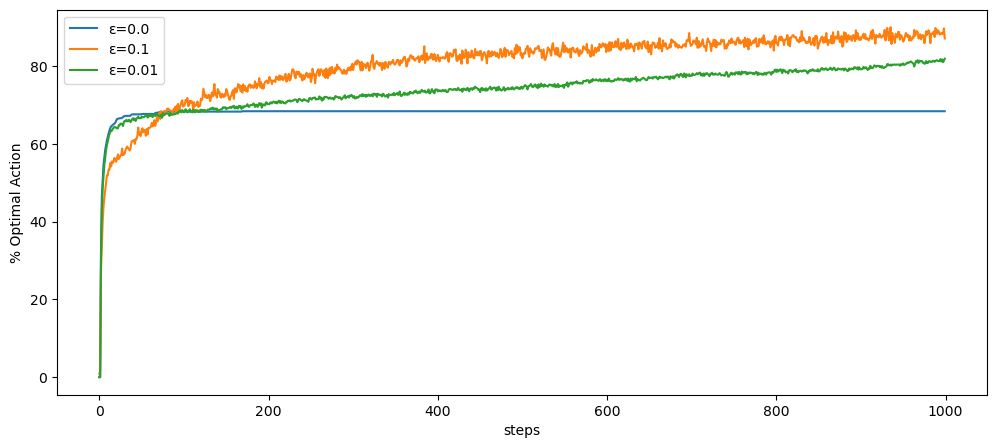

In [18]:
epsilons = np.array([0.0, 0.1, 0.01])
epochs = 1000
runs = 1000

# where we store the simulation results
avg_rewards = {} 
avg_optimal = {} 

for eps in epsilons:
    rewards, optimal = run_simulation(eps,epochs,runs)
    avg_rewards[eps] = rewards
    avg_optimal[eps] = optimal

# 1st Plot
plt.figure(figsize=(12, 5))
for eps in epsilons:
    plt.plot(avg_rewards[eps],label=f'ε={eps}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()
plt.show()

# 2nd Plot
plt.figure(figsize=(12, 5))
for eps in epsilons:
    plt.plot(avg_optimal[eps],label=f'ε={eps}')
plt.xlabel('steps')
plt.ylabel('% Optimal Action')
plt.legend()
plt.show()